In [2]:
from import_scripts.package_imports import *

In [3]:
df_fzi_2020 = pd.read_csv('./datasets/df_fzi_2020.csv')
df_fzi_2020_grouped = pd.read_csv('./datasets/df_fzi_2020_groupedByTrackID.csv')

In [4]:
# pearson correlation coefficient
print(f"len x: {len(df_fzi_2020_grouped['x'][0])}")
print(f"len vx: {len(df_fzi_2020_grouped['vx'][0])}")
print(f"x as list: {df_fzi_2020_grouped['x'][0]}")
print(f"vx as list: {df_fzi_2020_grouped['vx'][0]}")
# r_x_xv = stats.pearsonr(df_fzi_2022_grouped['x'][0], df_fzi_2022_grouped['vx'][0])

len x: 1303
len vx: 1138
x as list: [-19.356829, -19.349871, -19.336969, -19.322906, -19.309502, -19.299744, -19.287006, -19.276663, -19.261766, -19.248581, -19.234844, -19.218222, -19.202904, -19.18943, -19.178991, -19.167463, -19.152037, -19.135738, -19.12022, -19.101265, -19.07106, -19.035294, -19.000656, -18.973789, -18.940178, -18.917603, -18.883209, -18.865438, -18.851978, -18.812035, -18.807611, -18.80933, -18.807598, -18.805698, -18.799967, -18.791916, -18.786528, -18.780172, -18.770388, -18.554779, -18.22484, -18.094139, -17.648439, -17.282963, -16.828104, -16.457125, -16.096464, -15.502151, -15.130879, -14.954057, -14.60748, -14.372102, -14.085964, -13.59201, -13.355993, -13.25126, -12.986383, -12.625217, -12.291845, -11.971166, -11.552122, -11.177108, -10.622986, -10.139367, -9.597646, -9.094902, -8.598239, -8.071052, -7.595897, -7.237839, -6.705081, -6.076941, -5.47506, -4.92201, -4.356944, -3.685428, -3.121791, -2.557051, -1.950064, -1.489237, -0.811684, -0.286077, 0.23980

Pearson's r coefficient: PearsonRResult(statistic=0.9265221479552637, pvalue=8.600714902679237e-50)
Pearson's r coefficient: PearsonRResult(statistic=0.9113167963383513, pvalue=2.3032284824577134e-45)


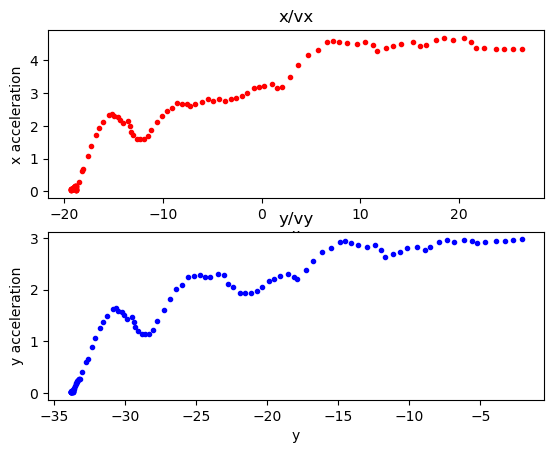

In [5]:
# Calculate Pearson correlation coefficient for track_id #5
# plot v/y against acceleration in x/y
df_fzi_2020_track_id_5 = df_fzi_2020.loc[df_fzi_2020['track_id'] == 5]
track_id_5_x = df_fzi_2020_track_id_5['x']
track_id_5_vx = df_fzi_2020_track_id_5['vx']
track_id_5_y = df_fzi_2020_track_id_5['y']
track_id_5_vy = df_fzi_2020_track_id_5['vy']
r_x_vx = stats.pearsonr(track_id_5_x, track_id_5_vx)
r_y_vy = stats.pearsonr(track_id_5_y, track_id_5_vy)
print(f"Pearson's r coefficient: {r_x_vx}")
print(f"Pearson's r coefficient: {r_y_vy}")

fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax1.title.set_text("x/vx")
ax1.set_xlabel("x")
ax1.set_ylabel("x acceleration")
ax1 = plt.plot(track_id_5_x, track_id_5_vx, 'r.')

ax2 = fig.add_subplot(2,1,2)
ax2.title.set_text("y/vy")
ax2.set_xlabel("y")
ax2.set_ylabel("y acceleration")
ax2 = plt.plot(track_id_5_y, track_id_5_vy, 'b.')
plt.show()

Pearson's r coefficient: PearsonRResult(statistic=0.8790130205655161, pvalue=0.0)
Pearson's r coefficient: PearsonRResult(statistic=0.8929939732602167, pvalue=0.0)


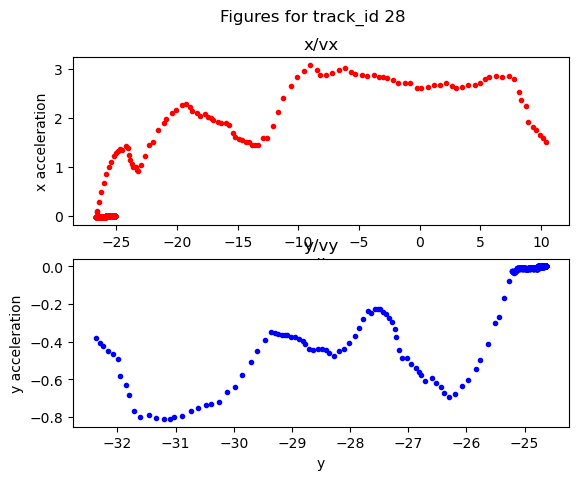

In [6]:
# Calculate Pearson correlation coefficient for track_id #9
# plot v/y against acceleration in x/y

track_id = 28
df_track_id = df_fzi_2020.loc[df_fzi_2020['track_id'] == track_id]
x = df_track_id['x']
vx = df_track_id['vx']
y = df_track_id['y']
vy = df_track_id['vy']
r_x_vx = stats.pearsonr(x, vx)
r_y_vy = stats.pearsonr(y, vy)
print(f"Pearson's r coefficient: {r_x_vx}")
print(f"Pearson's r coefficient: {r_y_vy}")

fig = plt.figure()
fig.suptitle(f"Figures for track_id {track_id}")
ax1 = fig.add_subplot(2,1,1)
ax1.title.set_text("x/vx")
ax1.set_xlabel("x")
ax1.set_ylabel("x acceleration")
ax1 = plt.plot(x, vx, 'r.')

ax2 = fig.add_subplot(2,1,2)
ax2.title.set_text("y/vy")
ax2.set_xlabel("y")
ax2.set_ylabel("y acceleration")
ax2 = plt.plot(y, vy, 'b.')
plt.show()

In [19]:
# Calculate Pearsons r for x/y against vx/vy for each track_id

# create df for pearsons r and track id
track_id_list = []
r_x_vx_list = []
r_y_vy_list = []
for track_id in df_fzi_2020['track_id'].unique():
    # filter for track_id
    df_track_id = df_fzi_2020.loc[df_fzi_2020['track_id'] == track_id]
    x = df_track_id['x']
    vx = df_track_id['vx']
    y = df_track_id['y']
    vy = df_track_id['vy']
    r_x_vx = stats.pearsonr(x, vx)[0]
    r_y_vy = stats.pearsonr(y, vy)[0]
    track_id_list.append(track_id)
    r_x_vx_list.append(r_x_vx)
    r_y_vy_list.append(r_y_vy)

print(track_id_list)
print(r_x_vx_list)
print(r_y_vy_list)

[5, 6, 9, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 88, 89, 90, 91, 92, 93, 95, 96, 97, 98, 99, 100, 101, 102, 103]
[0.9265221479552637, 0.7787850402559384, nan, 0.7486110178668942, 0.8790130205655161, 0.6749818072106043, 0.1035947952842774, 0.2908271020685771, 0.5313045044638929, 0.6248275323273217, -0.0081298624085348, -0.2306932734466784, -0.015509483883370588, 0.14111570846999413, 0.13087540387925636, 0.32022942810858357, 0.08087800128266706, 0.40134610512034813, -0.2507290444585075, 0.11692999982088086, 0.39575225632913424, 0.7568640774524666, 0.18403967853164882, 0.6636148789097965, 0.16416851281811595, 0.4364761948854016, -0.003512486222479537, 0.19083898506370123, -0.14395410296449973, -0.1207632270742502, 0.4287160372145891, 0.08071550459809744, 0.7060855781889375, 0.3554757668509618, 0.33263115512642233, 0.26

/var/folders/62/25scbj796hdf5c9rt_j0r2300000gn/T/ipykernel_6748/3835707661.py:14: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r_x_vx = stats.pearsonr(x, vx)[0]
/var/folders/62/25scbj796hdf5c9rt_j0r2300000gn/T/ipykernel_6748/3835707661.py:15: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r_y_vy = stats.pearsonr(y, vy)[0]


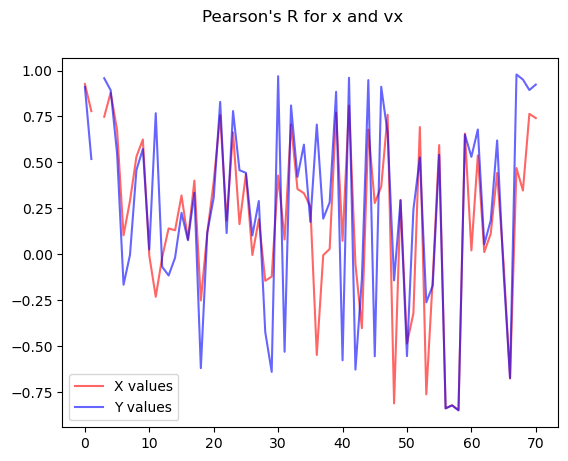

In [29]:
fig = plt.figure()
fig.suptitle("Pearson's R for x and vx")
ax = fig.add_subplot(1,1,1)
ax = plt.plot(np.arange(0,len(r_x_vx_list),1), r_x_vx_list, 'r', label='X values', alpha=0.6)
ax = plt.plot(np.arange(0,len(r_y_vy_list),1), r_y_vy_list, 'b', label='Y values', alpha=0.6)
plt.legend()

plt.show()

In [37]:
indices_low_r_x_vx = [i for i in range(0,len(r_x_vx_list),1) if abs(r_x_vx_list[i]) < 0.4]
print(len(indices_low_r_x_vx))
indices_low_r_y_vy = [i for i in range(0,len(r_y_vy_list),1) if abs(r_y_vy_list[i]) < 0.4]
print(len(indices_low_r_y_vy))

36
26


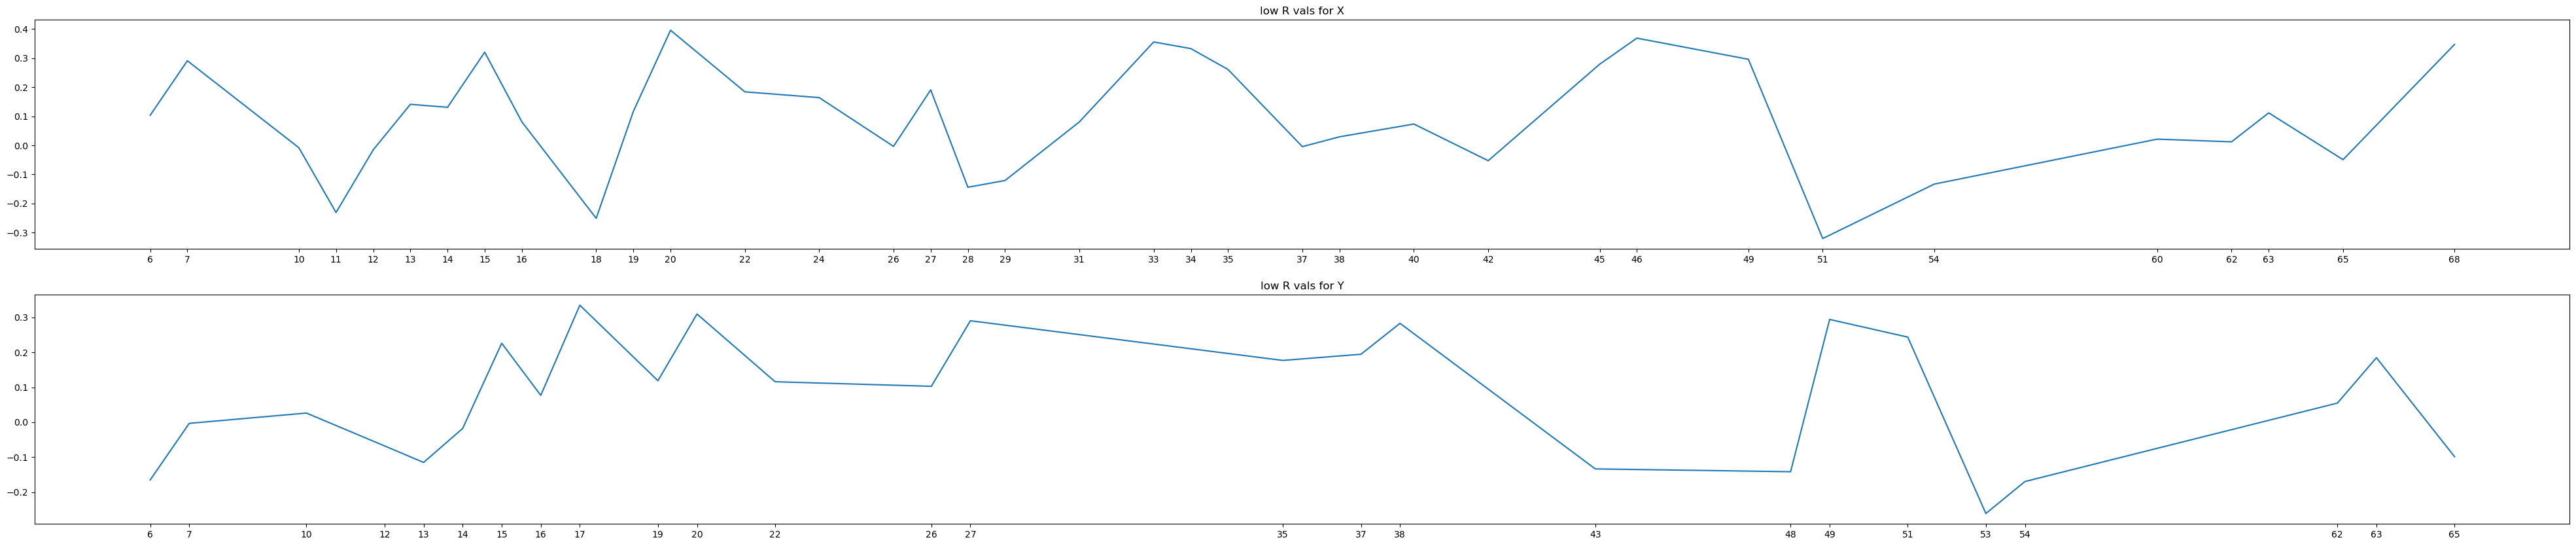

22


In [44]:
fig = plt.figure(figsize=(50,10))
ax1 = fig.add_subplot(2,1,1)
ax1.set_xticks(indices_low_r_x_vx)
ax1.set_title('low R vals for X')
ax1 = plt.plot(indices_low_r_x_vx, [r_x_vx_list[i] for i in indices_low_r_x_vx])
ax2 = fig.add_subplot(2,1,2)
ax2.set_title("low R vals for Y")
ax2.set_xticks(indices_low_r_y_vy)
ax2 = plt.plot(indices_low_r_y_vy, [r_y_vy_list[i] for i in indices_low_r_y_vy])
plt.show()
indices_low_r_intersection = np.intersect1d(indices_low_r_x_vx,indices_low_r_y_vy)
print(len(indices_low_r_intersection))

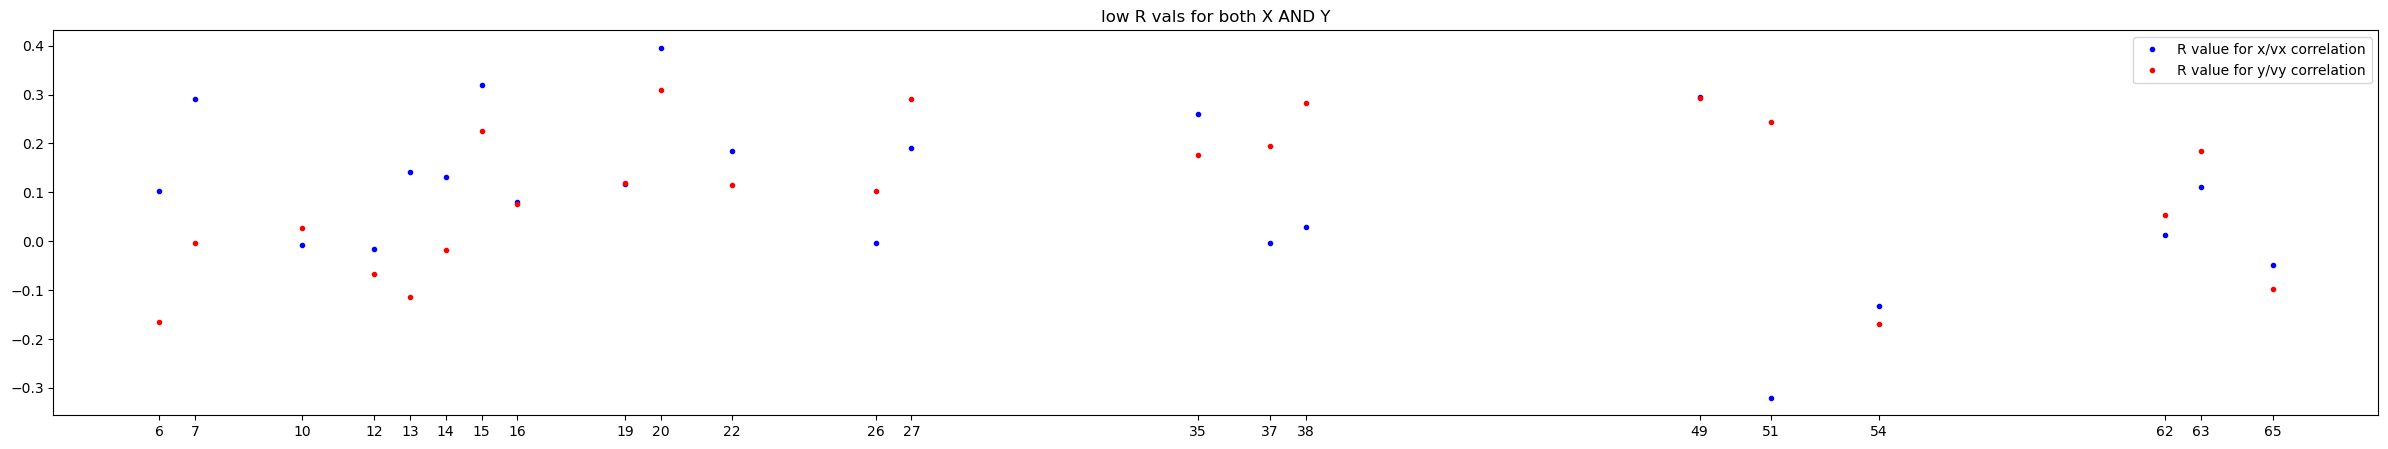

In [48]:
# print r values where both x/vx and y/vy have a low y score
fig = plt.figure(figsize=(30,5))
ax1 = fig.add_subplot(1,1,1)
ax1.set_xticks(indices_low_r_intersection)
ax1.set_title('low R vals for both X AND Y')
ax1 = plt.plot(indices_low_r_intersection, [r_x_vx_list[i] for i in indices_low_r_intersection], 'b.', label="R value for x/vx correlation")
ax1 = plt.plot(indices_low_r_intersection, [r_y_vy_list[i] for i in indices_low_r_intersection], 'r.', label="R value for y/vy correlation")
plt.legend()
plt.show()


In [50]:
# check for track_id 10
df_fzi_2020_track_id_10 = df_fzi_2020.loc[df_fzi_2020['track_id'] == track_id_list[10]]

Pearson's r coefficient: PearsonRResult(statistic=-0.0081298624085348, pvalue=0.9479395020446241)
Pearson's r coefficient: PearsonRResult(statistic=0.02614629968124811, pvalue=0.8336481748850743)


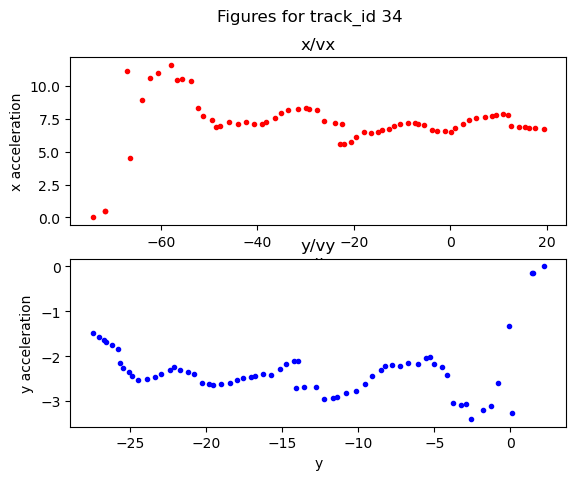

In [51]:
# Calculate Pearson correlation coefficient for track_id #9
# plot v/y against acceleration in x/y

track_id = track_id_list[10]
df_track_id = df_fzi_2020.loc[df_fzi_2020['track_id'] == track_id]
x = df_track_id['x']
vx = df_track_id['vx']
y = df_track_id['y']
vy = df_track_id['vy']
r_x_vx = stats.pearsonr(x, vx)
r_y_vy = stats.pearsonr(y, vy)
print(f"Pearson's r coefficient: {r_x_vx}")
print(f"Pearson's r coefficient: {r_y_vy}")

fig = plt.figure()
fig.suptitle(f"Figures for track_id {track_id}")
ax1 = fig.add_subplot(2,1,1)
ax1.title.set_text("x/vx")
ax1.set_xlabel("x")
ax1.set_ylabel("x acceleration")
ax1 = plt.plot(x, vx, 'r.')

ax2 = fig.add_subplot(2,1,2)
ax2.title.set_text("y/vy")
ax2.set_xlabel("y")
ax2.set_ylabel("y acceleration")
ax2 = plt.plot(y, vy, 'b.')
plt.show()